# Extracting Activation Maps from Intermediate Layers

In [157]:
import os
import numpy as np
import matplotlib.pyplot as plt
import math

import tensorflow as tf
from tensorflow import keras
from keras.models import Model
from keras.preprocessing import image

### Load VGG16 Model

In [6]:
model = tf.keras.applications.vgg16.VGG16(include_top=False,
                                  weights='imagenet')

In [8]:
model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, None, None, 3)]   0         
                                                                 
 block1_conv1 (Conv2D)       (None, None, None, 64)    1792      
                                                                 
 block1_conv2 (Conv2D)       (None, None, None, 64)    36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, None, None, 64)    0         
                                                                 
 block2_conv1 (Conv2D)       (None, None, None, 128)   73856     
                                                                 
 block2_conv2 (Conv2D)       (None, None, None, 128)   147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, None, None, 128)   0     

### Extract Feature Maps

In [9]:
layer_name = 'block4_conv1'
intermediate_layer_model = Model(inputs=model.input,
                                 outputs=model.get_layer(layer_name).output)

We are creating a new model that uses the original model's input and outputs the output of the block4_conv1 layer in the VGG16 model so get_layer get's the layer we are interested in from the original model.

With this new model we can pass an image through and extract feature maps for it


In [13]:
os.getcwd()

'c:\\Users\\Bridget Leonard\\Desktop\\DNN'

In [14]:
img_path = 'C:\\Users\\Bridget Leonard\\Desktop\\DNN\\tensorflow_tutorial\\images\\clown-fish.png'

img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)

intermediate_output = intermediate_layer_model.predict(x)

1/1 [==============================] - 0s 227ms/step


### Visualize Feature Maps
A common way to do this is to display feature maps as images
There will be 32 feature maps because a Conv2D layer produces 32

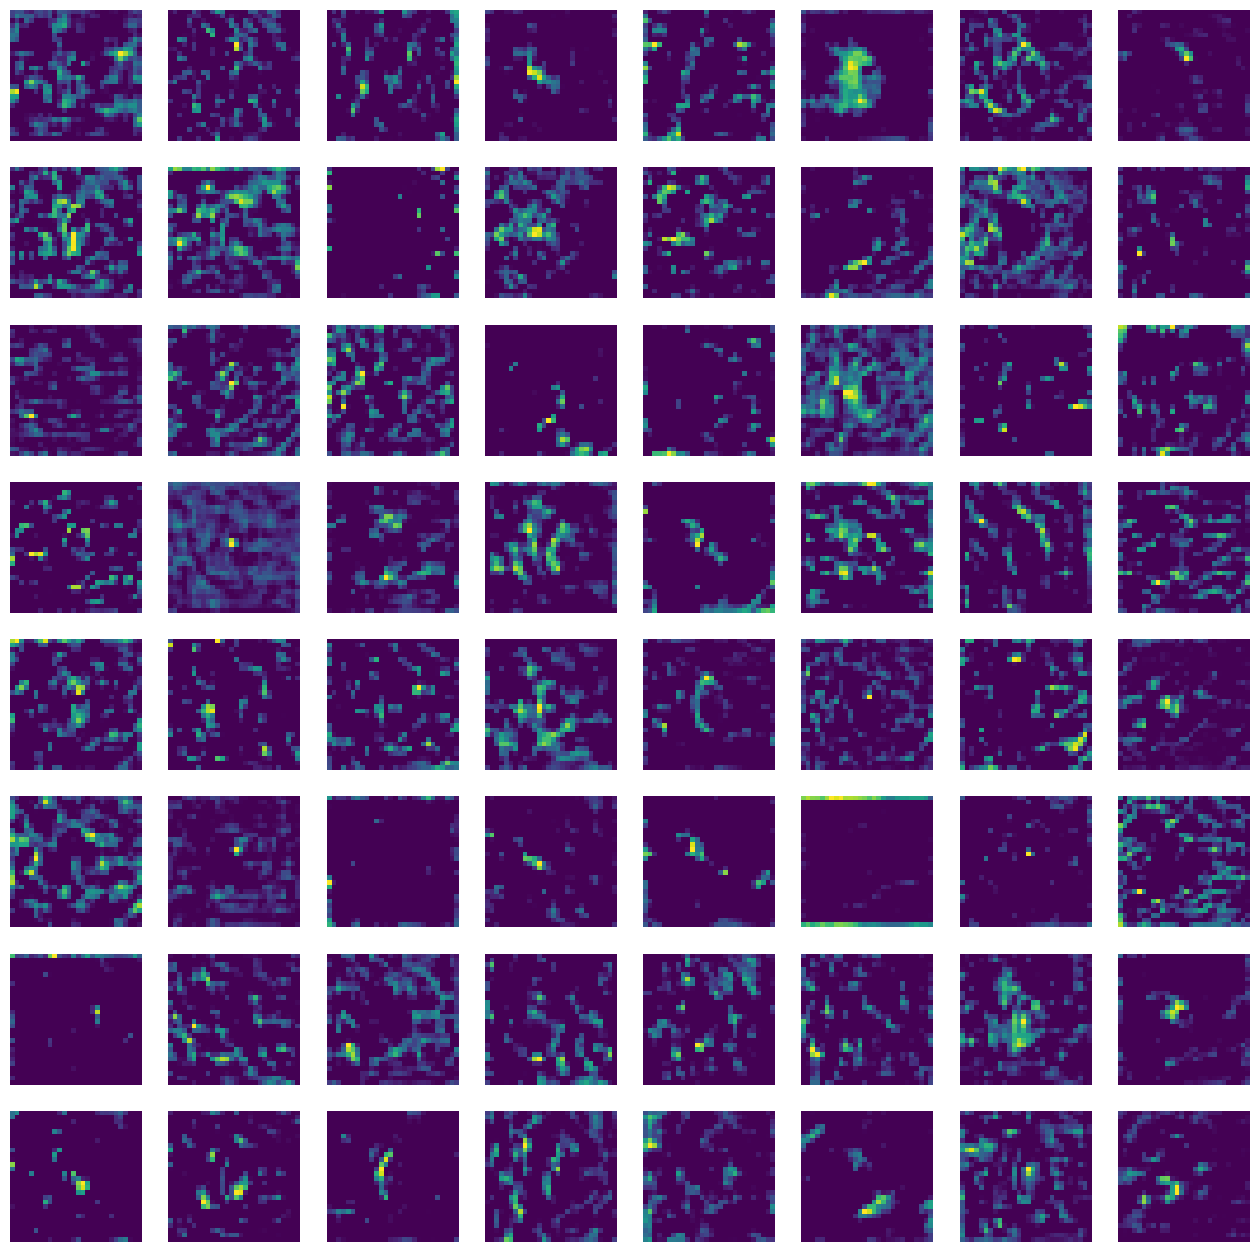

In [16]:
fig, axs = plt.subplots(8, 8, figsize=(16,16))
for i in range(8):
    for j in range(8):
        axs[i, j].imshow(intermediate_output[0,:,:,i*8+j])
        axs[i,j].axis('off')
plt.show()

In [105]:
len(intermediate_output)

1

Try with Hebart code in Python

In [116]:
import tensorflow as tf
from tensorflow.keras.applications import VGG16
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input
import numpy as np

def get_dnnres(stimuli, network):
    if network == 'vgg16':
        model = VGG16(weights='imagenet', include_top=False, pooling=None)
        layers = [2, 5, 9, 12, 15, 18]  # Convolutional layers

        resvec = [None] * len(layers)

        for i_image, img in enumerate(stimuli):
            print(f"\rProcessing image {i_image + 1}/{len(stimuli)}", end='')

            img = tf.io.read_file(img)
            img = tf.image.decode_image(img)
            img = tf.image.resize(img, (224,224))
            img = image.img_to_array(img).copy()
            img = np.expand_dims(img, axis=0)
            img = preprocess_input(img, data_format='channels_last')

            layer_outputs = [model.layers[layer_num].output for layer_num in layers]
            intermediate_model = tf.keras.Model(inputs=model.input, outputs=layer_outputs)
            layer_outputs = intermediate_model.predict(img)

            for i, layer_num in enumerate(layers):
                if resvec[i] is None:
                   resvec[i] = layer_outputs[i] #.reshape(-1)
                else:
                   resvec[i] = np.vstack((resvec[i], layer_outputs[i])) #.reshape(-1)))

        print("\nDone.")
        return resvec
    else:
        raise ValueError("Network not implemented.")

# Usage example:
# resvec = get_dnnres(stimuli, 'vgg16')


In [117]:
# create list with image paths
import glob

image_paths = sorted(glob.glob('./tensorflow_tutorial/images/*.png'))
print(image_paths)

['./tensorflow_tutorial/images\\baseball-player.png', './tensorflow_tutorial/images\\clown-fish.png', './tensorflow_tutorial/images\\elephant.png', './tensorflow_tutorial/images\\forklift.png', './tensorflow_tutorial/images\\ice-cream.png', './tensorflow_tutorial/images\\lemons.png', './tensorflow_tutorial/images\\magnetic-compass.png', './tensorflow_tutorial/images\\polar-bear.png']


In [118]:
resvec = get_dnnres(image_paths[:2], 'vgg16')

1/1 [==============================] - 0s 234ms/step

Done.


In [131]:
print("Number of convolutional layers extracted: ", len(resvec))
print("\nNumber of stimuli passed through: ", len(resvec[0]))
print("\nDimensions of first convolutional layers output feature map: ", resvec[0][0].shape)

Number of convolutional layers extracted:  6

Number of stimuli passed through:  2

Dimensions of first convolutional layers output feature map:  (224, 224, 64)


### Continuing with the first conv layer we can visualize all 64 feature maps

In [132]:
feature_maps = resvec[0][0]

IndexError: too many indices for array: array is 3-dimensional, but 4 were indexed

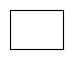

In [133]:
# plot all 64 maps in an 8x8 squares
square = 8
ix = 1
for _ in range(square):
	for _ in range(square):
		# specify subplot and turn of axis
		ax = plt.subplot(square, square, ix)
		ax.set_xticks([])
		ax.set_yticks([])
		# plot filter channel in grayscale
		plt.imshow(feature_maps[0, :, :, ix-1], cmap='gray')
		ix += 1
# show the figure
plt.show()

In [106]:
import seaborn as sns

for layer in range(len(resvec)):
    lay = resvec[layer]
    for stimuli in range(len(lay)):
        activ = lay[stimuli]
        sns.heatmap(activ)

IndexError: Inconsistent shape between the condition and the input (got (3211264, 1) and (3211264,))

In [154]:
def find_conv(model):
    if model == 'vgg16':
        model = VGG16()
        # summarize feature map shapes
        for i in range(len(model.layers)):
            lay = model.layers[i]
        # check for convolutional layer
            if 'conv' not in lay.name:
                continue
        # summarize output shape
            print(i, lay.name, lay.output.shape)

In [155]:
find_conv('vgg16')

1 block1_conv1 (None, 224, 224, 64)
2 block1_conv2 (None, 224, 224, 64)
4 block2_conv1 (None, 112, 112, 128)
5 block2_conv2 (None, 112, 112, 128)
7 block3_conv1 (None, 56, 56, 256)
8 block3_conv2 (None, 56, 56, 256)
9 block3_conv3 (None, 56, 56, 256)
11 block4_conv1 (None, 28, 28, 512)
12 block4_conv2 (None, 28, 28, 512)
13 block4_conv3 (None, 28, 28, 512)
15 block5_conv1 (None, 14, 14, 512)
16 block5_conv2 (None, 14, 14, 512)
17 block5_conv3 (None, 14, 14, 512)


In [177]:
def feature_maps(model, layer, img_path):
    if model == 'vgg16':
        model = VGG16()
        # refine model by selecting layer of interest
        model = Model(inputs=model.inputs, outputs=model.layers[layer].output)
        # load the image with required shape
        layer_input_shape = model.layers[layer].output.shape[1:3]
        img = tf.io.read_file(img_path)
        img = tf.image.decode_image(img)
        
        img = tf.image.resize(img, (224, 224))
        img = image.img_to_array(img).copy()
        img = np.expand_dims(img, axis=0)
        img = preprocess_input(img, data_format='channels_last')

        # get feature map for first hidden layer
        feature_maps = model.predict(img)

        num_images = model.layers[layer].output.shape[-1]
        square = math.ceil(np.sqrt(num_images))

        ix = 1
        fig, axs = plt.subplots(square, square, figsize=(16,16))
        for i in range(square):
            for j in range(square):
                axs[i, j].imshow(feature_maps[0, :, :, ix-1], cmap='gray')
                axs[i,j].axis('off')
        #for _ in range(square):
           # for _ in range(square):
        # specify subplot and turn of axis
            #    ax = plt.subplot(square, square, ix)
            #    ax.set_xticks([])
           #     ax.set_yticks([])
        # plot filter channel in grayscale
           #     plt.imshow(feature_maps[0, :, :, ix-1], cmap='gray')
                ix += 1
        # show the figure
        plt.show()

1/1 [==============================] - 0s 167ms/step


IndexError: index 512 is out of bounds for axis 3 with size 512

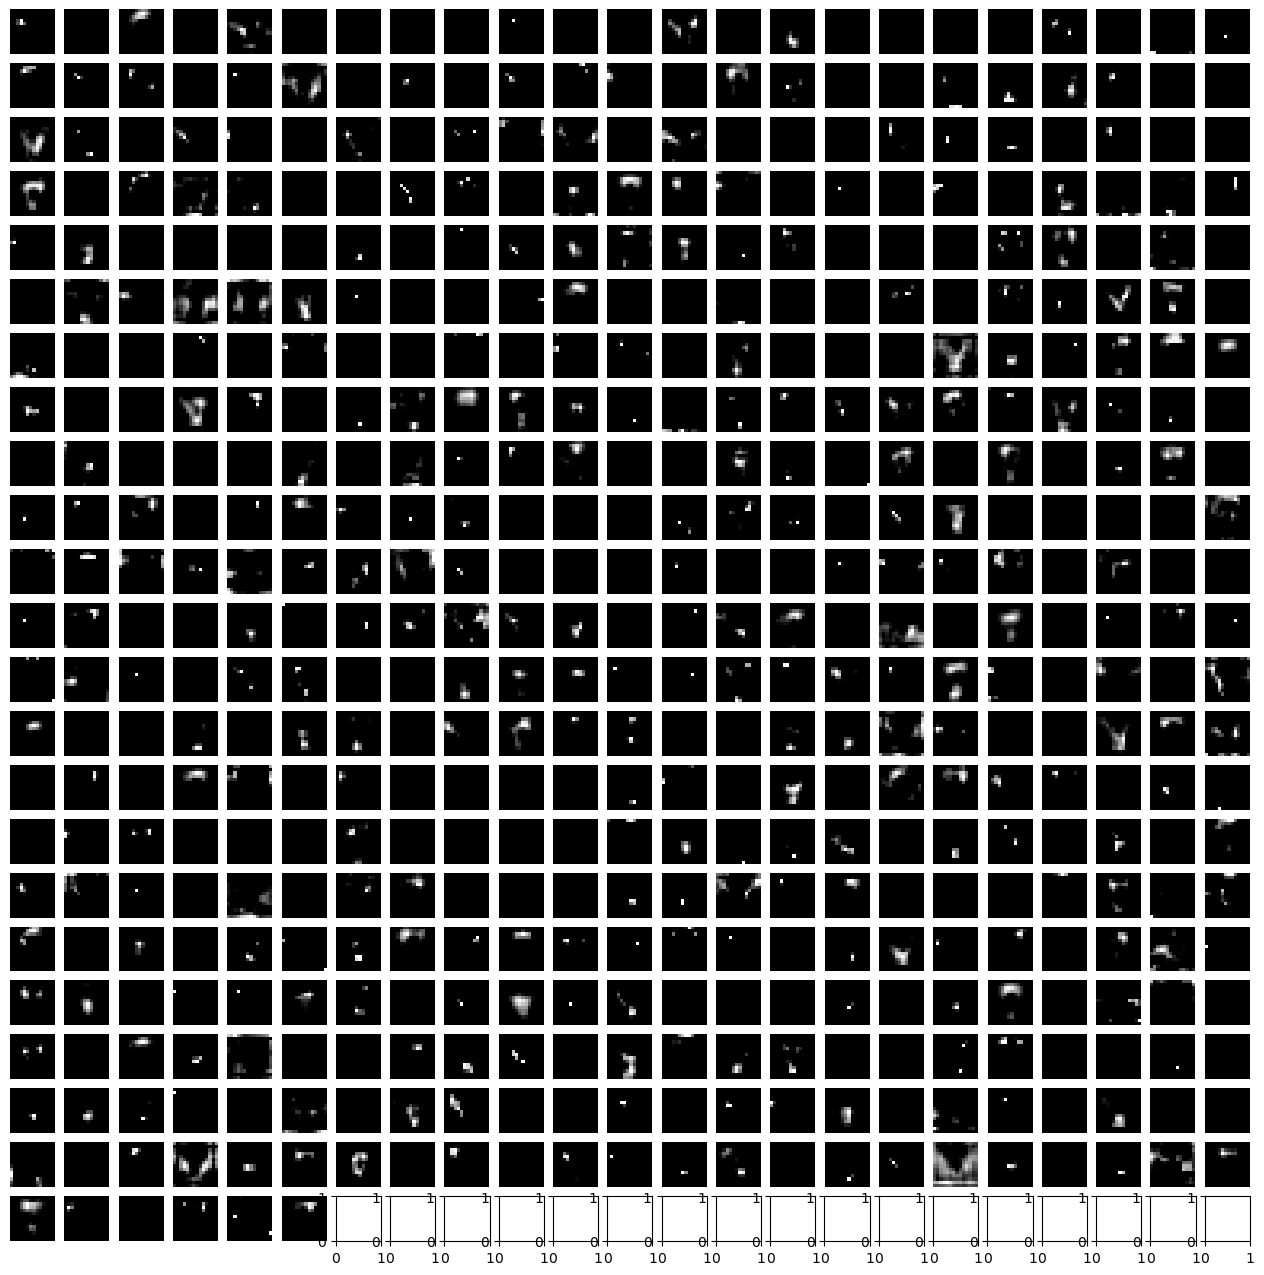

In [179]:
feature_maps('vgg16',layer=17, img_path='tensorflow_tutorial\images\elephant.png')

In [1]:
def extract_filters(model, layer, img_path):
    if model == 'vgg16':
        model = VGG16()
        # retrieve weights from layer of interest
        filters, biases = model.layers[layer].get_weights()

        # normalize filter values to 0-1 so we can visualize them
        f_min, f_max = filters.min(), filters.max()
        filters = (filters - f_min) / (f_max - f_min)

        # plot first few filters
        n_filters, ix = 6, 1
        for i in range(n_filters):
            # get the filter
            f = filters[:, :, :, i]
            # plot each channel separately
            for j in range(3):
                # specify subplot and turn of axis
                ax = plt.subplot(n_filters, 3, ix)
                ax.set_xticks([])
                ax.set_yticks([])
                # plot filter channel in grayscale
                plt.imshow(f[:, :, j], cmap='gray')
                ix += 1
        # show the figure
        plt.show()